**DATA UNDERSTANDING AND EXPLORATION**

Loading the Dataset

In [24]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Beginner_Reviews_dataset.csv')


Understanding the Structure of the Dataset

In [25]:
# Display the first few rows of the dataset
print(df.head())

# Display information about the dataset
print(df.info())

# Display basic statistics of the dataset
print(df.describe())

   Unnamed: 0                                           sentence  label
0           0                           Wow... Loved this place.      1
1           1                                 Crust is not good.      0
2           2          Not tasty and the texture was just nasty.      0
3           3  Stopped by during the late May bank holiday of...      1
4           4  The selection on the menu was great and so wer...      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   sentence    1000 non-null   object
 2   label       1000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.6+ KB
None
        Unnamed: 0       label
count  1000.000000  1000.00000
mean    499.500000     0.50000
std     288.819436     0.50025
min       0.000000     0.00000
25%     249.750000     0.00000
50%     499.500000   

Exploring the Dataset

label
1    500
0    500
Name: count, dtype: int64


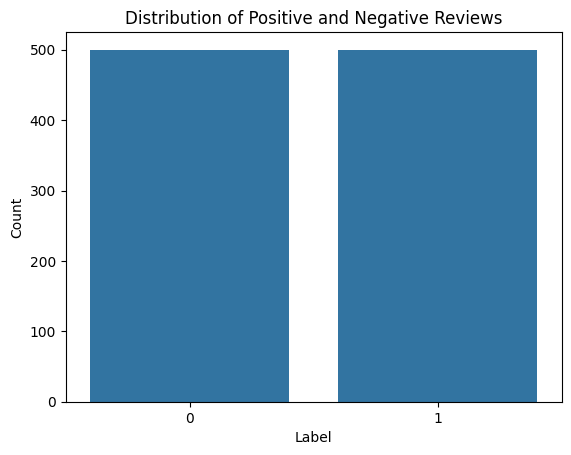

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the distribution of the label column
print(df['label'].value_counts())

# Plot the distribution of the label column
sns.countplot(x='label', data=df)
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Checking for Missing Values

Unnamed: 0    0
sentence      0
label         0
dtype: int64


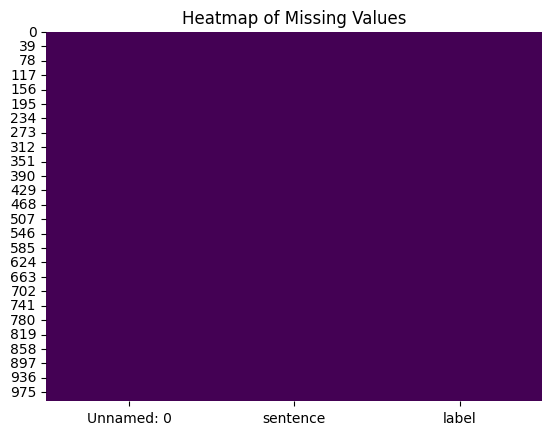

In [27]:
# Check for missing values
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


Analyzing the Sentence Length

count    1000.00000
mean       58.31600
std        32.36414
min        11.00000
25%        33.00000
50%        51.00000
75%        80.00000
max       149.00000
Name: sentence_length, dtype: float64


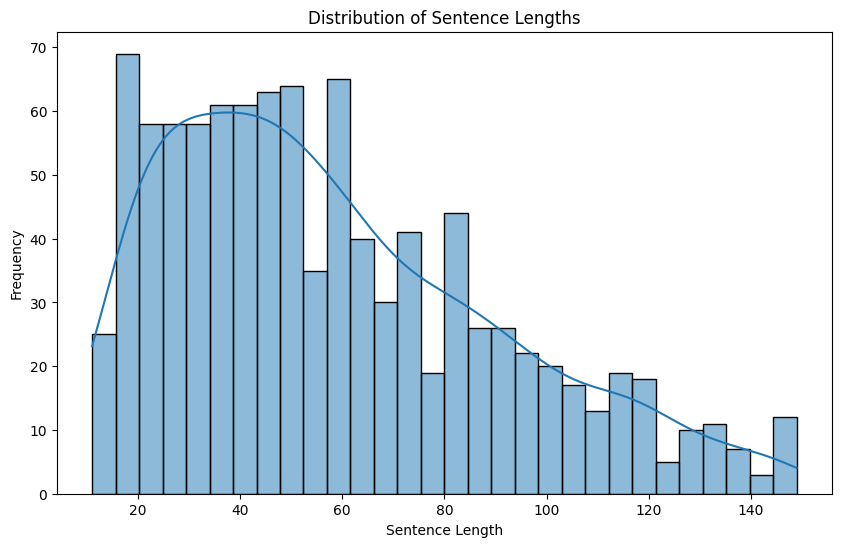

In [28]:
# Add a column for sentence length
df['sentence_length'] = df['sentence'].apply(len)

# Display basic statistics for sentence length
print(df['sentence_length'].describe())

# Plot the distribution of sentence lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['sentence_length'], bins=30, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()


**DATA PREPROCESSING**

Removing Noise

In [29]:
import re

def remove_noise(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Apply noise removal to the 'sentence' column
df['cleaned_sentence'] = df['sentence'].apply(remove_noise)


Lowercase Conversion

In [30]:
df['cleaned_sentence'] = df['cleaned_sentence'].str.lower()


Tokenization

In [31]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize sentences
df['tokenized_sentence'] = df['cleaned_sentence'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Stemming

In [32]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Apply stemming to each tokenized sentence
df['stemmed_sentence'] = df['tokenized_sentence'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])


**FEATURE EXTRACTION**

Load GloVe Embeddings

In [33]:
'''from gensim.models import KeyedVectors

# Specify the path to GloVe embeddings file
glove_path = 'glove.6B.100d.txt'

# Load GloVe embeddings using appropriate method
try:
    word_vectors = KeyedVectors.load_word2vec_format(glove_path, binary=False)
    print("GloVe embeddings loaded successfully!")
except ValueError as e:
    print(f"Error loading GloVe embeddings: {e}")
except FileNotFoundError:
    print(f"File '{glove_path}' not found. Please check the path and try again.")
'''

'from gensim.models import KeyedVectors\n\n# Specify the path to GloVe embeddings file\nglove_path = \'glove.6B.100d.txt\'\n\n# Load GloVe embeddings using appropriate method\ntry:\n    word_vectors = KeyedVectors.load_word2vec_format(glove_path, binary=False)\n    print("GloVe embeddings loaded successfully!")\nexcept ValueError as e:\n    print(f"Error loading GloVe embeddings: {e}")\nexcept FileNotFoundError:\n    print(f"File \'{glove_path}\' not found. Please check the path and try again.")\n'

Convert Sentences to GloVe Embeddings

In [34]:
'''
import numpy as np

def tokens_to_glove_embeddings(tokens):
    embeddings = []
    for token in tokens:
        if token in word_vectors.vocab:
            embeddings.append(word_vectors[token])
        else:
            # Handle out-of-vocabulary tokens (optional)
            embeddings.append(np.random.normal(scale=0.6, size=(100,)))  # Replace with random initialization or zeros
    return embeddings

# Apply GloVe embeddings conversion to each tokenized sentence
df['glove_embeddings'] = df['tokenized_sentence'].apply(tokens_to_glove_embeddings)

print(df[['sentence', 'glove_embeddings']])
'''

"\nimport numpy as np\n\ndef tokens_to_glove_embeddings(tokens):\n    embeddings = []\n    for token in tokens:\n        if token in word_vectors.vocab:\n            embeddings.append(word_vectors[token])\n        else:\n            # Handle out-of-vocabulary tokens (optional)\n            embeddings.append(np.random.normal(scale=0.6, size=(100,)))  # Replace with random initialization or zeros\n    return embeddings\n\n# Apply GloVe embeddings conversion to each tokenized sentence\ndf['glove_embeddings'] = df['tokenized_sentence'].apply(tokens_to_glove_embeddings)\n\nprint(df[['sentence', 'glove_embeddings']])\n"

Load Word2Vec Embeddings

In [35]:
from gensim.models import KeyedVectors
import gensim.downloader as api

# Download the Word2Vec model
word_vectors = api.load('word2vec-google-news-300')



 Convert Sentences to Word2Vec Embeddings

In [36]:
from gensim.models import KeyedVectors
import numpy as np

# Function to convert tokens to Word2Vec embeddings
def tokens_to_word2vec_embeddings(tokens, word_vectors):
    embeddings = []
    for token in tokens:
        if token in word_vectors.key_to_index:
            embeddings.append(word_vectors.get_vector(token))
        else:
            # Handle out-of-vocabulary tokens (optional)
            embeddings.append(np.zeros(word_vectors.vector_size))  # Replace with appropriate handling
    return embeddings

# Example usage after loading Word2Vec embeddings
# Assuming word_vectors is already loaded from GoogleNews-vectors-negative300.bin.gz

# Apply Word2Vec embeddings conversion to each tokenized sentence
df['word2vec_embeddings'] = df['tokenized_sentence'].apply(lambda tokens: tokens_to_word2vec_embeddings(tokens, word_vectors))

print(df[['sentence', 'word2vec_embeddings']])


                                              sentence  \
0                             Wow... Loved this place.   
1                                   Crust is not good.   
2            Not tasty and the texture was just nasty.   
3    Stopped by during the late May bank holiday of...   
4    The selection on the menu was great and so wer...   
..                                                 ...   
995  I think food should have flavor and texture an...   
996                           Appetite instantly gone.   
997  Overall I was not impressed and would not go b...   
998  The whole experience was underwhelming, and I ...   
999  Then, as if I hadn't wasted enough of my life ...   

                                   word2vec_embeddings  
0    [[0.125, 0.018066406, 0.057617188, 0.002273559...  
1    [[-0.37109375, 0.005493164, 0.06689453, 0.1699...  
2    [[0.08496094, -0.095214844, 0.119140625, 0.111...  
3    [[0.010986328, 0.05078125, 0.22265625, 0.02490...  
4    [[0.080078125

**MODEL SELECTION AND TRAINING**

Split Data into Training and Testing Sets

In [37]:
from sklearn.model_selection import train_test_split

# Assuming df['word2vec_embeddings'] contains the Word2Vec embeddings for each tokenized sentence
X = df['word2vec_embeddings']
y = df['label']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, convert X_train and X_test from list of lists to numpy arrays
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 800
Testing set size: 200


CHOOSE CLASSIFICATION ALGORITHMS

Logistic Regression

In [39]:
import numpy as np

# Function to aggregate Word2Vec embeddings (e.g., averaging)
def aggregate_embeddings(embeddings):
    if len(embeddings) == 0:
        return np.zeros(300)  # Adjust size according to your Word2Vec embeddings
    else:
        return np.mean(embeddings, axis=0)

# Example: Aggregate embeddings for X_train and X_test
X_train_aggregated = np.array([aggregate_embeddings(embeddings) for embeddings in X_train])
X_test_aggregated = np.array([aggregate_embeddings(embeddings) for embeddings in X_test])

# Now X_train_aggregated and X_test_aggregated should be numpy arrays
# with each element representing an aggregated vector for each sentence.

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_aggregated, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_aggregated)

# Evaluate model performance
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.72      0.89      0.79        96
           1       0.87      0.68      0.76       104

    accuracy                           0.78       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.80      0.78      0.78       200



Naive Bayes Classifier

In [42]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model (no need for aggregation with Naive Bayes)
nb_model.fit(X_train_aggregated, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test_aggregated)

# Evaluate model performance
print("Naive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Performance:
Accuracy: 0.645
              precision    recall  f1-score   support

           0       0.60      0.76      0.67        96
           1       0.71      0.54      0.61       104

    accuracy                           0.65       200
   macro avg       0.66      0.65      0.64       200
weighted avg       0.66      0.65      0.64       200



Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_aggregated, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_aggregated)

# Evaluate model performance
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        96
           1       0.80      0.72      0.76       104

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



Support Vector Machine Classifier

In [44]:
from sklearn.svm import SVC

# Initialize SVM model with linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train_aggregated, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_aggregated)

# Evaluate model performance
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))


SVM Performance:
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        96
           1       0.88      0.67      0.76       104

    accuracy                           0.78       200
   macro avg       0.80      0.78      0.78       200
weighted avg       0.80      0.78      0.78       200



XGBoost Classifier

In [45]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_aggregated, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_aggregated)

# Evaluate model performance
print("XGBoost Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance:
Accuracy: 0.785
              precision    recall  f1-score   support

           0       0.75      0.82      0.79        96
           1       0.82      0.75      0.78       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.79      0.79      0.78       200



KNN Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train_aggregated, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test_aggregated)

# Evaluate model performance
print("K-Nearest Neighbors (KNN) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Performance:
Accuracy: 0.685
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        96
           1       0.75      0.60      0.66       104

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.68       200
weighted avg       0.70      0.69      0.68       200



Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_aggregated, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_aggregated)

# Evaluate model performance
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance:
Accuracy: 0.655
              precision    recall  f1-score   support

           0       0.62      0.71      0.66        96
           1       0.69      0.61      0.65       104

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.65       200



Gradient Boosting Machines

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train_aggregated, y_train)

# Predict on the test set
y_pred_gbm = gbm_model.predict(X_test_aggregated)

# Evaluate model performance
print("Gradient Boosting Machine (GBM) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gbm)}")
print(classification_report(y_test, y_pred_gbm))


Gradient Boosting Machine (GBM) Performance:
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        96
           1       0.84      0.74      0.79       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



Neural Networks

In [49]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP model
mlp_model = MLPClassifier(random_state=42)

# Train the model
mlp_model.fit(X_train_aggregated, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test_aggregated)

# Evaluate model performance
print("Multilayer Perceptron (MLP) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(classification_report(y_test, y_pred_mlp))


Multilayer Perceptron (MLP) Performance:
Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        96
           1       0.86      0.80      0.83       104

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MODEL OPTIMIZATION


In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_aggregated)
X_test_scaled = scaler.transform(X_test_aggregated)

# Initialize MLP model with adjusted parameters
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.001, random_state=42)

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate model performance
print("Multilayer Perceptron (MLP) Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_mlp)}")
print(classification_report(y_test, y_pred_mlp))


Multilayer Perceptron (MLP) Performance:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        96
           1       0.85      0.79      0.82       104

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 25)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(MLPClassifier(random_state=42, max_iter=500), param_grid, cv=3)
grid_search.fit(X_train_aggregated, y_train)

print("Best parameters found:")
print(grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_aggregated)

print("Best MLP Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best)}")
print(classification_report(y_test, y_pred_best))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters found:
{'alpha': 0.001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1}
Best MLP Classifier Performance:
Accuracy: 0.845
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        96
           1       0.87      0.83      0.85       104

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

